### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv("D:/Topmentor_Python_Class/Bank_loan_status.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Preprocessing the Dataset

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [10]:
cat = [i for i in df.columns if df[i].nunique()<10]
neum = [i for i in df.columns if df[i].nunique()>=10 and i!='Loan_ID']

In [11]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [12]:
neum

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Exploratory Data Analysis

Searching for ouliers Present in dataset

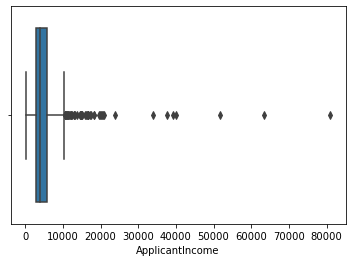

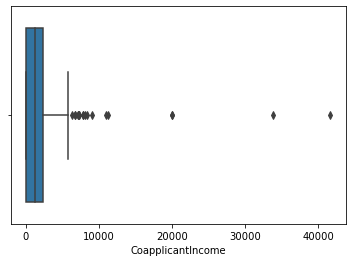

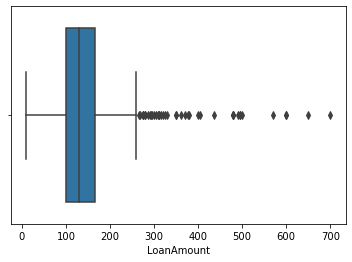

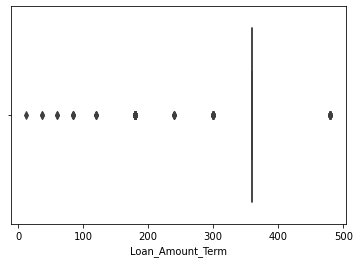

<Figure size 432x288 with 0 Axes>

In [17]:
for i in neum:
    sns.boxplot(df[i])
    plt.figure()

#### Categorical Data Analysis

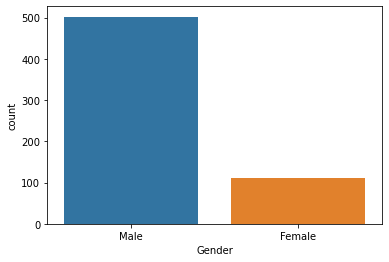

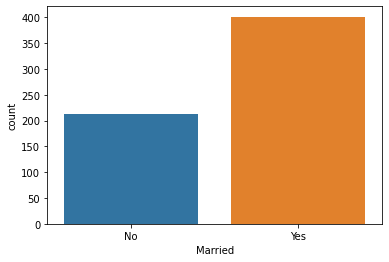

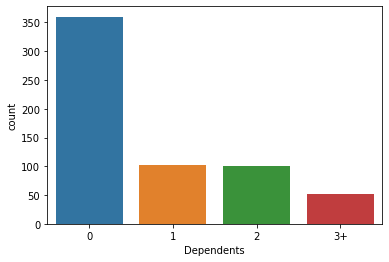

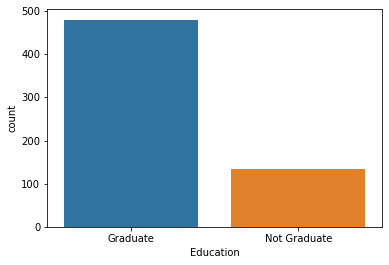

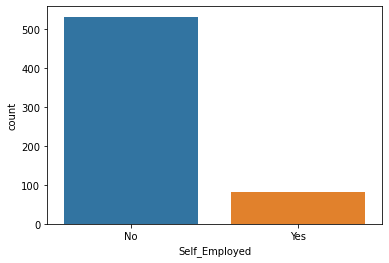

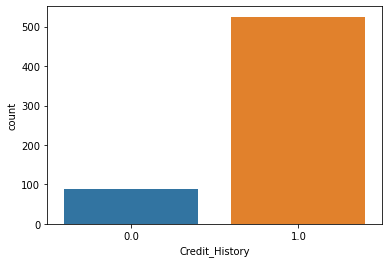

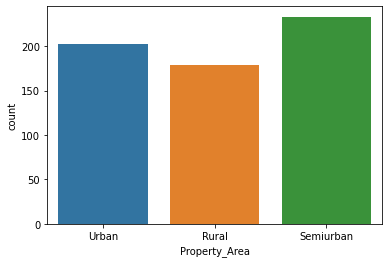

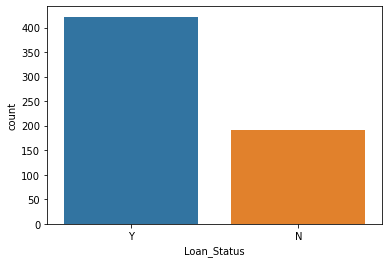

<Figure size 432x288 with 0 Axes>

In [18]:
for i in cat:
    sns.countplot(df[i])
    plt.figure()

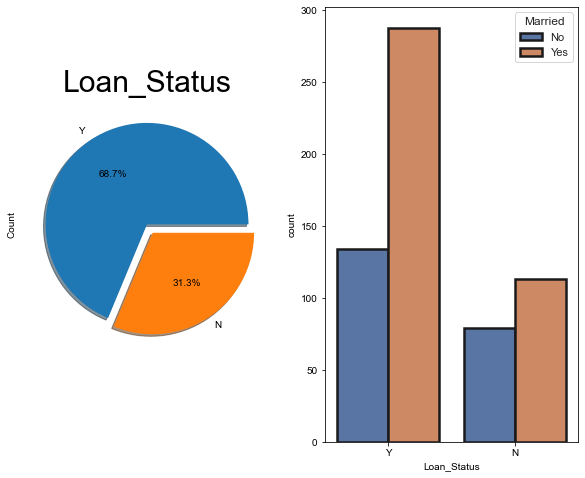

In [19]:
# Variable - Loan_Status
fig,ax=plt.subplots(1,2,figsize=(10,8))
df['Loan_Status'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Loan_Status',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Loan_Status',hue='Married',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

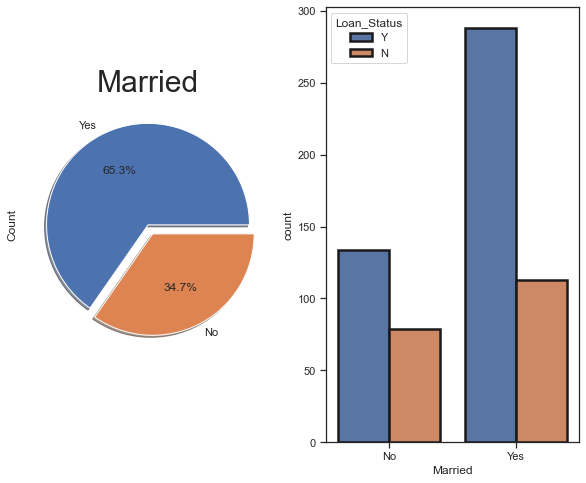

In [20]:
# Variable - Married
fig,ax=plt.subplots(1,2,figsize=(10,8))
df['Married'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Married',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Married',hue='Loan_Status',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

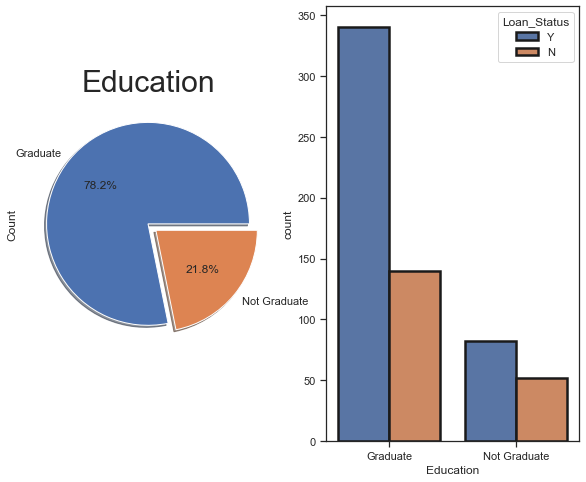

In [21]:
# Variable - Education
fig,ax=plt.subplots(1,2,figsize=(10,8))
df['Education'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Education',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Education',hue='Loan_Status',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

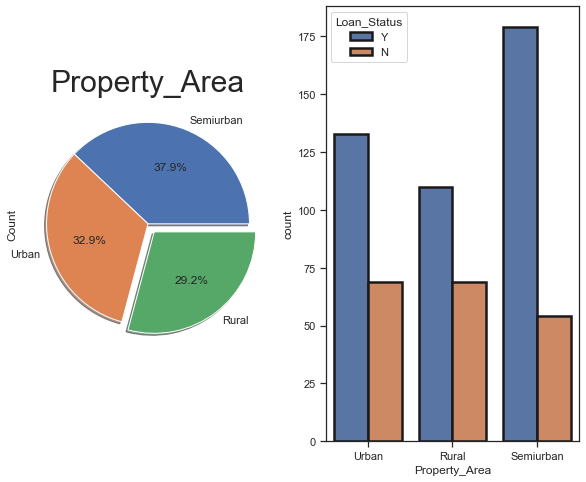

In [22]:
# Variable - Property_Area
fig,ax=plt.subplots(1,2,figsize=(10,8))
df['Property_Area'].value_counts().plot.pie(ax=ax[0],explode=[0,0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Property_Area',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Property_Area',hue='Loan_Status',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

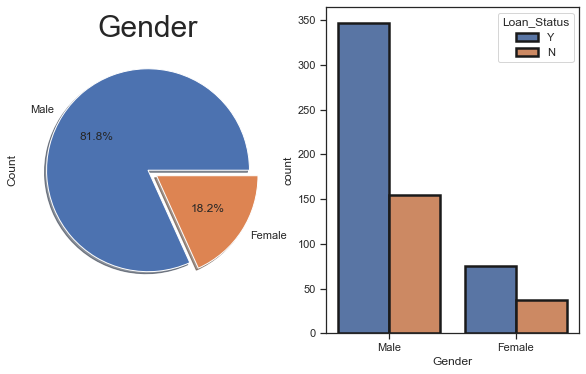

In [23]:
# Variable - Gender
fig,ax=plt.subplots(1,2,figsize=(10,6))
df['Gender'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Gender',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Gender',hue='Loan_Status',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

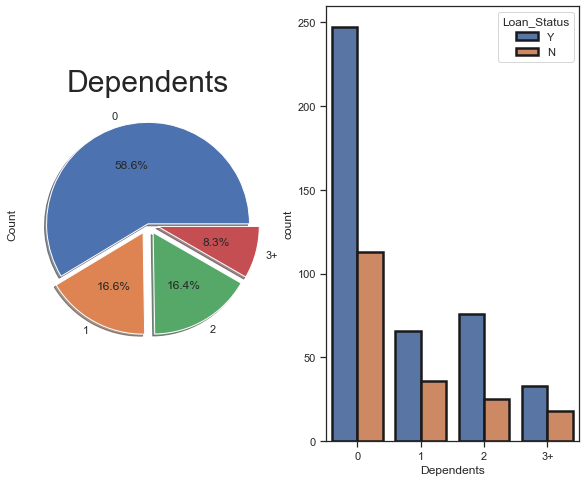

In [24]:
# Variable - Dependents
f,ax=plt.subplots(1,2,figsize=(10,8))
df['Dependents'].value_counts().plot.pie(ax=ax[0],explode = [0,0.1,0.1,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Dependents',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Dependents',hue='Loan_Status',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

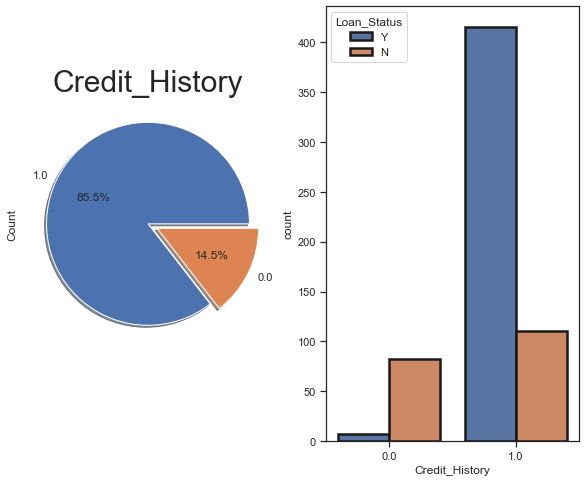

In [25]:
# Variable - Credit_History
f,ax=plt.subplots(1,2,figsize=(10,8))
df['Credit_History'].value_counts().plot.pie(ax=ax[0],explode = [0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Credit_History',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Credit_History',hue='Loan_Status',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

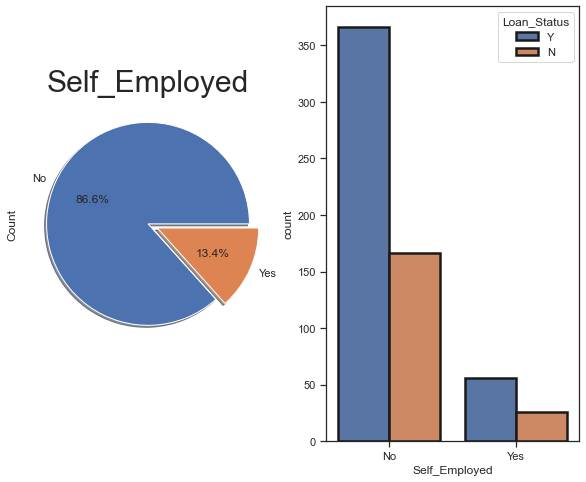

In [26]:
# Variable - Self_Employed
fig,ax=plt.subplots(1,2,figsize=(10,8))
df['Self_Employed'].value_counts().plot.pie(ax=ax[0],explode = [0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Self_Employed',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Self_Employed',hue='Loan_Status',linewidth=2.5,edgecolor=".1",data=df,ax=ax[1])
plt.ioff()

#### Neumerical Data Analysis

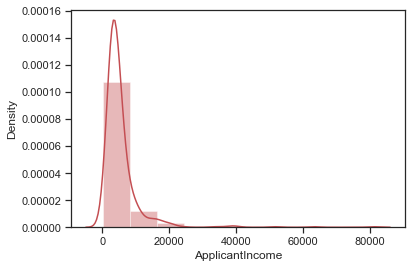

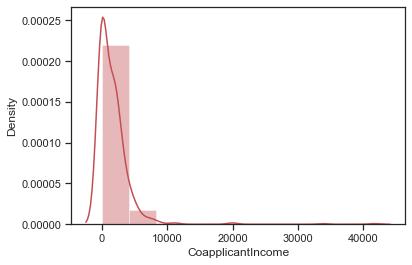

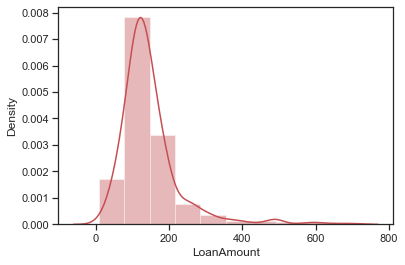

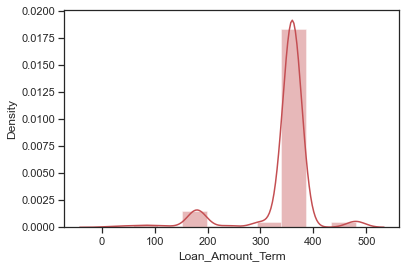

<Figure size 432x288 with 0 Axes>

In [27]:
for i in neum:
    sns.distplot(df[i], color='r',kde=True,bins = 10)
    plt.figure()

<AxesSubplot:>

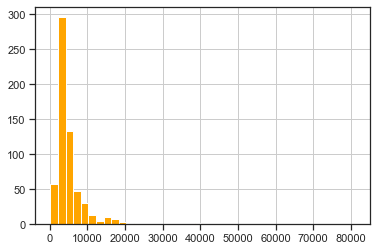

In [28]:
#Variable - ApplicantIncome
#Histogram
df['ApplicantIncome'].hist(bins=40,color='orange')

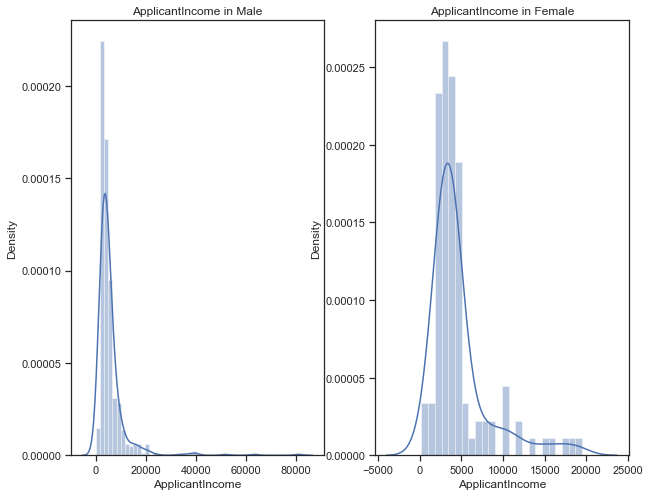

In [29]:
#Genderwise ApplicantIncome Distribution
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Gender']=='Male']['ApplicantIncome'],ax=ax[0])
ax[0].set_title('ApplicantIncome in Male')
sns.distplot(df[df['Gender']=='Female']['ApplicantIncome'],ax=ax[1])
ax[1].set_title('ApplicantIncome in Female')
plt.show()

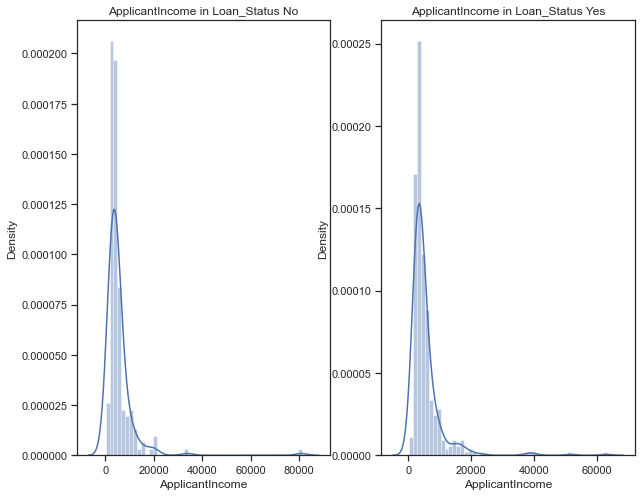

In [30]:
#Loan status wise ApplicantIncome Distribution
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Loan_Status']=='N']['ApplicantIncome'],ax=ax[0])
ax[0].set_title('ApplicantIncome in Loan_Status No')
sns.distplot(df[df['Loan_Status']=='Y']['ApplicantIncome'],ax=ax[1])
ax[1].set_title('ApplicantIncome in Loan_Status Yes')
plt.show()

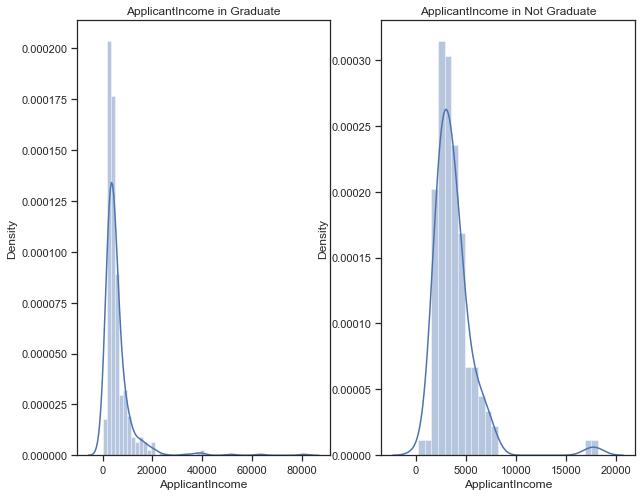

In [31]:
#Education wise ApplicantIncome Distribution
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Education']=='Graduate']['ApplicantIncome'],ax=ax[0])
ax[0].set_title('ApplicantIncome in Graduate')
sns.distplot(df[df['Education']=='Not Graduate']['ApplicantIncome'],ax=ax[1])
ax[1].set_title('ApplicantIncome in Not Graduate')
plt.show()

<AxesSubplot:>

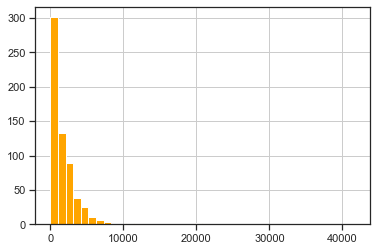

In [32]:
#Variable - CoApplicantIncome
#Histogram
df['CoapplicantIncome'].hist(bins=40,color='orange')

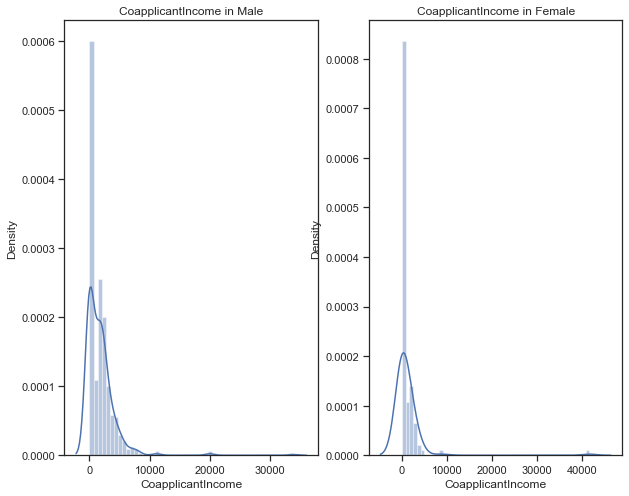

In [33]:
#Genderwise ApplicantIncome Distribution
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Gender']=='Male']['CoapplicantIncome'],ax=ax[0])
ax[0].set_title('CoapplicantIncome in Male')
sns.distplot(df[df['Gender']=='Female']['CoapplicantIncome'],ax=ax[1])
ax[1].set_title('CoapplicantIncome in Female')
plt.show()

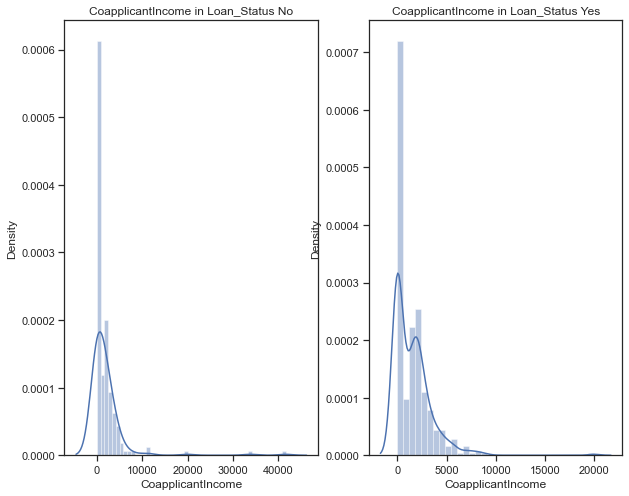

In [34]:
#Loan status wise ApplicantIncome Distribution
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Loan_Status']=='N']['CoapplicantIncome'],ax=ax[0])
ax[0].set_title('CoapplicantIncome in Loan_Status No')
sns.distplot(df[df['Loan_Status']=='Y']['CoapplicantIncome'],ax=ax[1])
ax[1].set_title('CoapplicantIncome in Loan_Status Yes')
plt.show()

<AxesSubplot:>

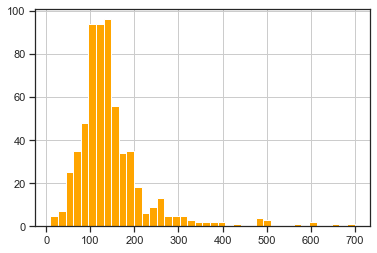

In [35]:
#Variable - CoApplicantIncome
#Histogram
df['LoanAmount'].hist(bins=40,color='orange')

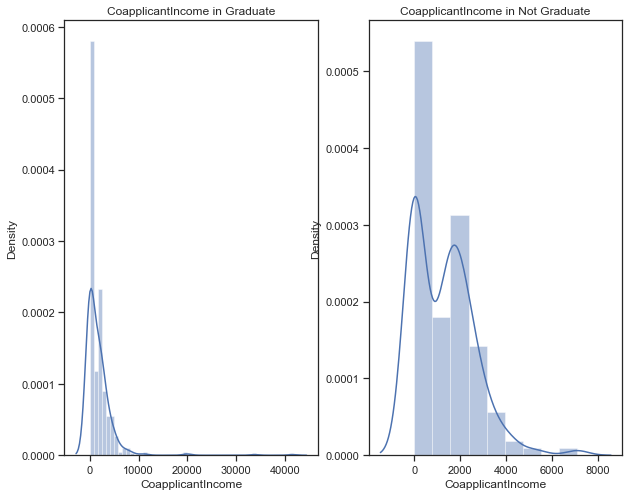

In [36]:
#Education wise CoApplicantIncome Distribution
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Education']=='Graduate']['CoapplicantIncome'],ax=ax[0])
ax[0].set_title('CoapplicantIncome in Graduate')
sns.distplot(df[df['Education']=='Not Graduate']['CoapplicantIncome'],ax=ax[1])
ax[1].set_title('CoapplicantIncome in Not Graduate')
plt.show()

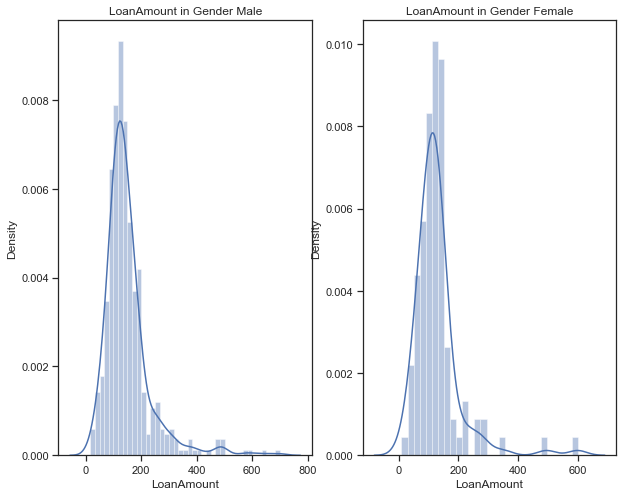

In [37]:
#Variable - LoanAmount
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Gender']=='Male']['LoanAmount'],ax=ax[0])
ax[0].set_title('LoanAmount in Gender Male')
sns.distplot(df[df['Gender']=='Female']['LoanAmount'],ax=ax[1])
ax[1].set_title('LoanAmount in Gender Female')
plt.show()

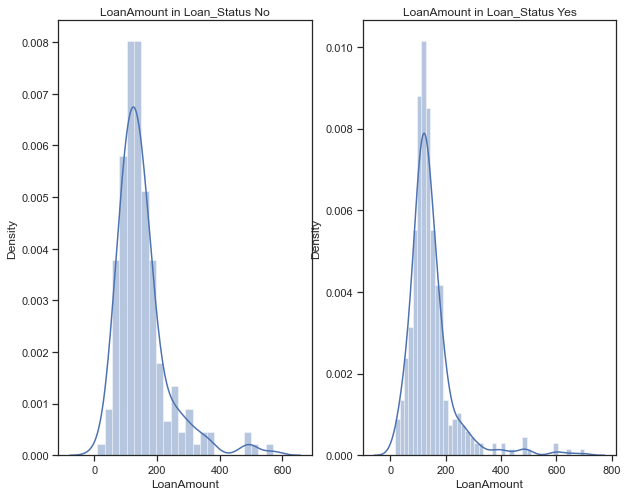

In [38]:
#Loan_Status wise Loan Amount
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Loan_Status']=='N']['LoanAmount'],ax=ax[0])
ax[0].set_title('LoanAmount in Loan_Status No')
sns.distplot(df[df['Loan_Status']=='Y']['LoanAmount'],ax=ax[1])
ax[1].set_title('LoanAmount in Loan_Status Yes')
plt.show()

<AxesSubplot:>

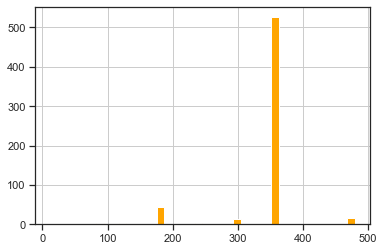

In [39]:
#Variable - CoApplicantIncome
#Histogram
df['Loan_Amount_Term'].hist(bins=40,color='orange')

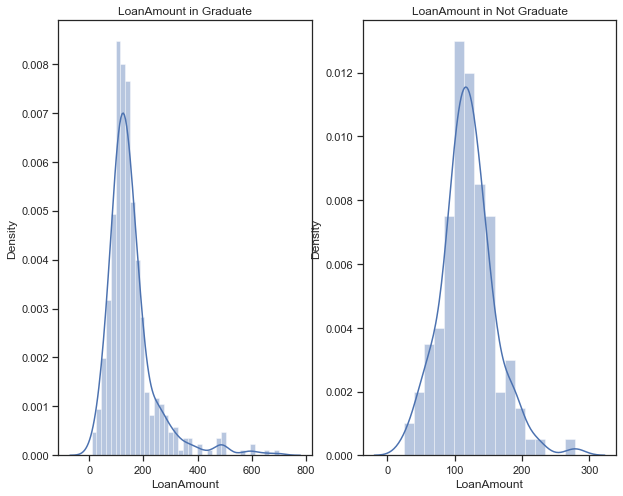

In [40]:
#Education wise Loan Amount
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Education']=='Graduate']['LoanAmount'],ax=ax[0])
ax[0].set_title('LoanAmount in Graduate')
sns.distplot(df[df['Education']=='Not Graduate']['LoanAmount'],ax=ax[1])
ax[1].set_title('LoanAmount in Not Graduate')
plt.show()

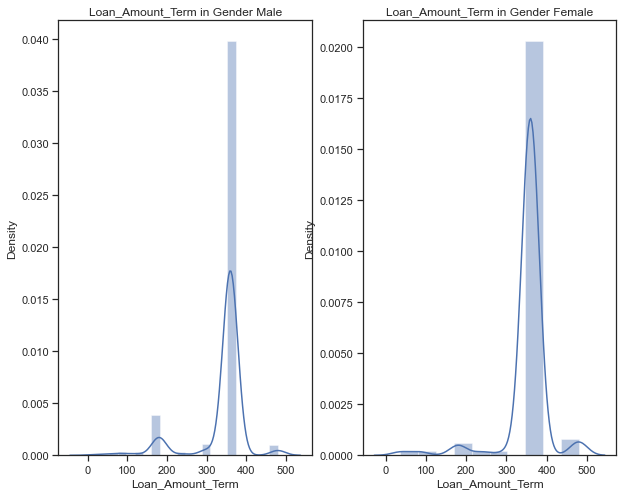

In [41]:
#Variable - LoanAmountTerm
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Gender']=='Male']['Loan_Amount_Term'],ax=ax[0])
ax[0].set_title('Loan_Amount_Term in Gender Male')
sns.distplot(df[df['Gender']=='Female']['Loan_Amount_Term'],ax=ax[1])
ax[1].set_title('Loan_Amount_Term in Gender Female')
plt.show()

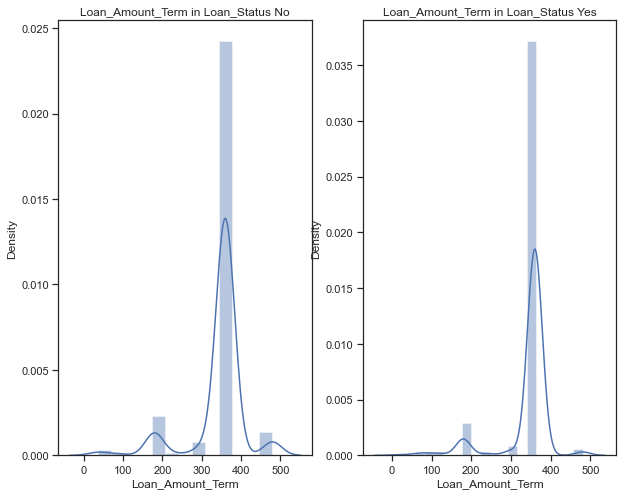

In [42]:
#Loan_Status wise Loan Amount
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Loan_Status']=='N']['Loan_Amount_Term'],ax=ax[0])
ax[0].set_title('Loan_Amount_Term in Loan_Status No')
sns.distplot(df[df['Loan_Status']=='Y']['Loan_Amount_Term'],ax=ax[1])
ax[1].set_title('Loan_Amount_Term in Loan_Status Yes')
plt.show()

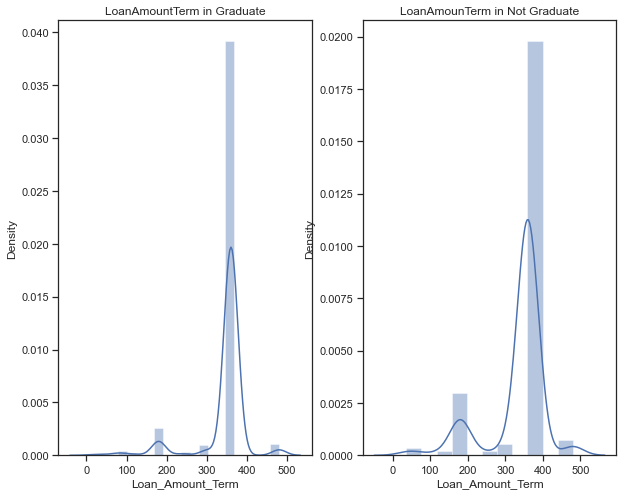

In [43]:
#Education wise Loan Amount Term
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['Education']=='Graduate']['Loan_Amount_Term'],ax=ax[0])
ax[0].set_title('LoanAmountTerm in Graduate')
sns.distplot(df[df['Education']=='Not Graduate']['Loan_Amount_Term'],ax=ax[1])
ax[1].set_title('LoanAmounTerm in Not Graduate')
plt.show()

In [44]:
df.shape

(614, 13)

In [45]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncomelog'] = np.log(df['CoapplicantIncome'])
df['LoanAmountlog'] = np.log(df['LoanAmount'])
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncomelog'] = np.log(df['TotalIncome'])

In [46]:
df.shape

(614, 18)

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,TotalIncome,TotalIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,6000.0,8.699515


Text(0.5, 1.0, 'ApplicantIncomelog')

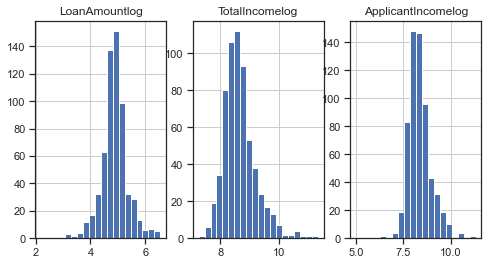

In [48]:
fig,ax=plt.subplots(1,3,figsize=(8,4))
df['LoanAmountlog'].hist(bins = 20, ax=ax[0])
ax[0].set_title('LoanAmountlog')
df['TotalIncomelog'].hist(bins = 20,ax =ax[1])
ax[1].set_title('TotalIncomelog')
df['ApplicantIncomelog'].hist(bins = 20, ax=ax[2])
ax[2].set_title('ApplicantIncomelog')

### Correlation Matrix

<AxesSubplot:>

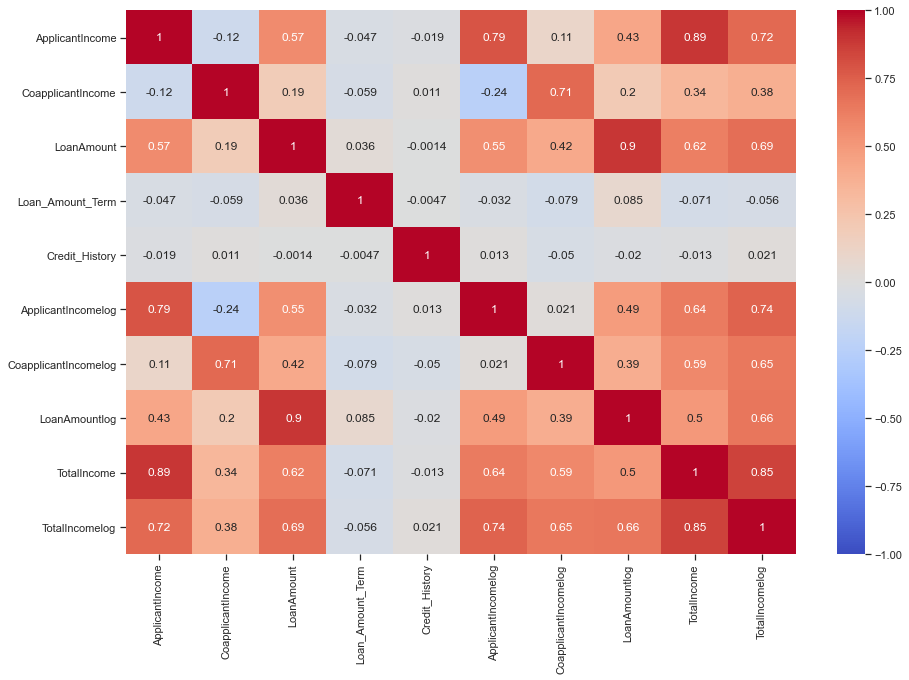

In [49]:
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr, annot =True, vmin=-1, vmax=1,cmap='coolwarm')

In [50]:
## drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term','TotalIncome','Loan_ID','CoapplicantIncomelog']
data = df.drop(columns = cols , axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,TotalIncomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,8.699515


In [51]:
data.shape

(614, 11)

### Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
cols1 = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for i in cols1 :
    data[i] = le.fit_transform(data[i])

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,TotalIncomelog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,8.699515


### Modelling Phase

In [56]:
X = data.drop(columns ='Loan_Status',axis =1)
y=data['Loan_Status']

In [57]:
X.shape,y.shape

((614, 10), (614,))

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [60]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
#Function to find the best random state
def randomstate(X,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = i)
        model.fit(X_train,y_train)
        p=model.predict(X_test)
        accu=accuracy_score(p,y_test)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [62]:
#Splitting data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = randomstate(X,y))

In [63]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier()]

In [64]:
#To evakuate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [65]:
#Creates and trains model from the models list
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,X,y,cv=10)
        performance(p,testy,model,testx,score) 

In [66]:
createmodel(X_train,X_test,y_train,y_test)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.878
----------------------------------------------------------
Mean of Cross Validation Score 0.7965
----------------------------------------------------------
Confusion Matrix
[[19  1]
 [14 89]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.95      0.72        20
           1       0.99      0.86      0.92       103

    accuracy                           0.88       123
   macro avg       0.78      0.91      0.82       123
weighted avg       0.92      0.88      0.89       123

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.813
----------------------------------------------------------
Mean of Cross Validation Score 0.7492
----------------------------------------------------------
Confusion Matrix
[[13  3]
 [20